<a href="https://colab.research.google.com/github/AMNAALMGLY/Machine-Learning-From-Scratch/blob/main/UnsupervisedLearning_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd 'drive/MyDrive'

/content/drive/MyDrive


#Importing libraries and reading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from ipywidgets import interact
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
data=pd.read_csv('Data.csv')

#Investigating data

In [ ]:

data.head(),data.shape,data.isnull().sum()

(    f1   f2   f3   f4
 0  5.1  3.5  1.4  0.2
 1  4.9  3.0  1.4  0.2
 2  4.7  3.2  1.3  0.2
 3  4.6  3.1  1.5  0.2
 4  5.0  3.6  1.4  0.2, (150, 4), f1    0
 f2    0
 f3    0
 f4    0
 dtype: int64)

#Visualizing Data

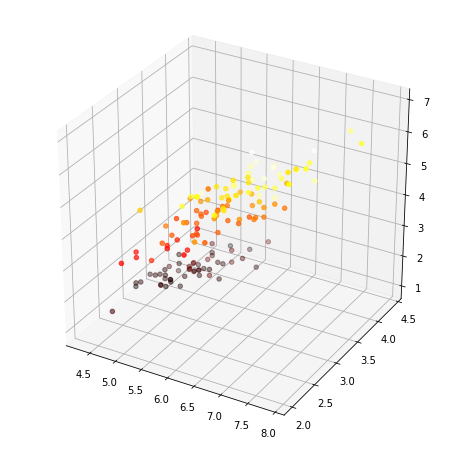

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],c=data.iloc[:,3],cmap=plt.hot())

We can see that data range is close to each other and it doesnot need to be rescaled  or standardize but can be seperated into distance based clusters .

#PCA implementation from scratch




In [ ]:
class PCA:
  def __init__(self,n_components):
    """Initializing the PCA model.
        Parameters
        ----------
        n_components : number of components to be preserved
        class instance varaibles
        projectionM:projection matrix
        principalValues:eign values of the highest variance(eign values) n_components
        values:eign values of the covariance matrix

        Returns
        -------
        self : object
    """
    self.n_components=n_components
    self.projectionM=0
    self.principalValues=0
    self.values=0


  def standardize(self,data):
    """Helper method :rescaling data into standard normal distribution (between -3 and 3)
        Parameters
        ----------
        data :A data frame of shape(n_sample,n_features)

        Returns
        -------
        standardized data frame:shape(n_samples,n_features)
    """
    return (data-data.mean())/data.std() 
  def fit(self,x):
    """building model  projection vectors and matrix 
        Parameters
        ----------
        x :A data frame of shape(n_sample,n_features)

        Returns
        -------
        model projection matrix:shape(n_features,n_features)
    """

    #first standardize the data
    x=self.standardize(x).values
    #calculating covariance matrix
    cov=np.cov(x.T)
    ##SVD decompesition of covariance matrix

    vectors,values,vectorsT=np.linalg.svd(cov)
    self.values=values
    idx=np.argsort(values)[::-1][:self.n_components]
    ##reduction according to n_components
    principalValues=values[idx]
    projectionM=vectors[:,idx]
    self.principalValues=principalValues
    self.projectionM=projectionM
    return projectionM

  def transform(self,x):
    """transfroming into new space with the less dimension
        Parameters
        ----------
        x :A data frame of shape(n_sample,n_features)

        Returns
        -------
        transfromed data frame:shape(n_samples,n_components)
    """
    
    return self.standardize(x).dot(self.projectionM)

  def inverseTransform(self,transformed):
    """inverse transfroming into the original space with higher dimension
        Parameters
        ----------
        x :A data frame of shape(n_sample,n_features)

        Returns
        -------
        original  data frame:shape(n_samples,n_features)
    """

    return transformed.dot(self.projectionM.T)
 
  #explained varaince and n components
  def getComponents(self):
    """gets principal n_component matrix
        Parameters
        ----------
        

        Returns
        -------
        projection matrix :shape(n_features,n_features)
    """
    return self.projectionM

  def getExplainedVariance(self):
    """gets percentage of preserved variance of each component
        Parameters
        ----------
        

        Returns
        -------
        percentage of every component variance to total variance:an array of  shape(n_features,1)
    """
    return self.values/np.sum(self.values)



#Instantiate the PCA model

In [ ]:
PCAmodel=PCA(2)
PCAmodel.fit(data)
transformed=PCAmodel.transform(data)
print('transformed data head', transformed.head())

transformed data head           0         1
0  2.257141 -0.478424
1  2.074013  0.671883
2  2.356335  0.340766
3  2.291707  0.595400
4  2.381863 -0.644676


In [ ]:
transformed[:]

,0,1
0,-2.640270,-5.204041
1,-2.670730,-4.666910
2,-2.454606,-4.773636
3,-2.545517,-4.648463
4,-2.561228,-5.258629
...,...,...
145,-7.000417,-5.579908
146,-6.584640,-4.935618
147,-6.726747,-5.484342
148,-6.748228,-5.765416


#explained variance:

In [ ]:
print('var percentage of each component',PCAmodel.getExplainedVariance())

var percentage of each component [0.72962445 0.22850762 0.03668922 0.00517871]


#observation:
only the first component represent the data well , the second  component can be add also

#inverse transform to original space

In [ ]:
print('original space from inverse transform ',PCAmodel.inverseTransform(transformed).head())
print('original data ',standardize(data).head())

original space from inverse transform            0         1         2         3
0 -0.995554  1.049682 -1.298357 -1.242934
1 -1.334278 -0.061716 -1.220240 -1.216497
2 -1.356417  0.320045 -1.375994 -1.353803
3 -1.418845  0.067535 -1.344719 -1.334343
4 -0.997796  1.236775 -1.366675 -1.302255
original data           f1        f2        f3        f4
0 -0.897674  1.015602 -1.335752 -1.311052
1 -1.139200 -0.131539 -1.335752 -1.311052
2 -1.380727  0.327318 -1.392399 -1.311052
3 -1.501490  0.097889 -1.279104 -1.311052
4 -1.018437  1.245030 -1.335752 -1.311052


#Visualization of 2 principal components

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


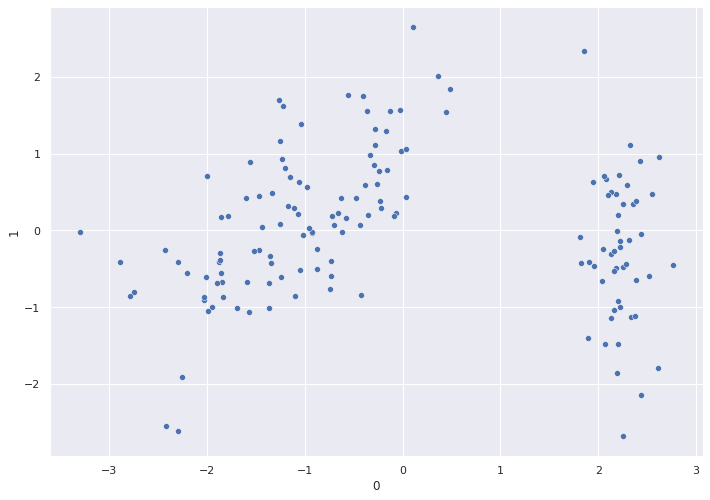

In [ ]:
sns.scatterplot(transformed.iloc[:,0],transformed.iloc[:,1])
#sns.scatterplot(new_data['f1'],new_data['f3'],hue=new_data['centroid'])

it is clear that the data vary alot along the zero component (accounts for 72% of the variance data)